# 11 Health SHAP Analysis

###### **Project:** NORI  
**Author:** Yuseof J  
**Date:** 28/12/25

### **Purpose**


### **Inputs**
- ``

### **Outputs**
- ``
  
--------------------------------------------------------------------------

### 0. Imports and Setup

In [37]:
# package imports
import os
import shap
import pickle
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# specify filepaths
path_model_features = 'data/processed/master_features.csv'
path_model_targets = 'data/processed/outcomes_health.csv'
path_final_model_pkl = 'models/xgb_health_model.pkl'


# ensure cwd is project root for file paths to function properly
project_root = Path(os.getcwd())            # get current directory
while not (project_root / "data").exists(): # keep moving up until in parent
    project_root = project_root.parent
os.chdir(project_root)                      # switch to parent directory

### 1. Load Data

In [38]:
# load economic mobility model
with open(path_final_model_pkl, 'rb') as model_file:
    model = pickle.load(model_file)

# load tracts with features 
X = pd.read_csv(path_model_features)

### 2. SHAP Analysis

In [39]:
# drop nan rows in feature set before running shap 
X = X.dropna()

# drop geoid
X.drop(columns=['GEOID'], inplace=True)

In [40]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

 99%|===================| 2150/2168 [00:18<00:00]        

#### **A. Global Importance Plot**

Which features matter most overall to the model's predictions?

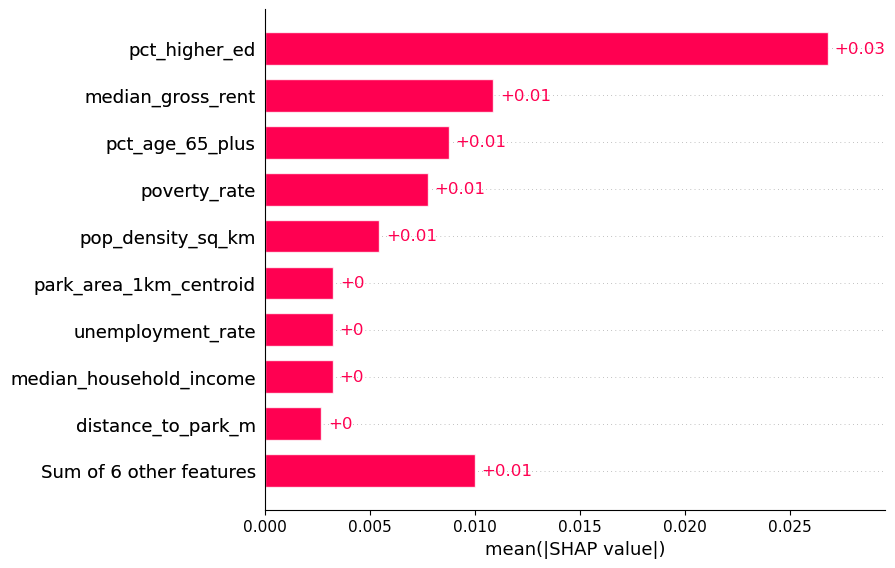

In [41]:
shap.plots.bar(shap_values)

Here we see that the features making the highest contributions to the model's predictions are demographic / socioeconomic (gini_index, poverty_rate, pct_higher_ed). We do however see that park and green space related features have some (although modest) impact on model predictions as well. This indicates the possibility that scoecioeconomic factors may better explain variation in tract-level health outcomes than the built environment does. Or it may simply indiciate that these specific green features are not as influential as other green features. More analysis is needed to know for sure. 

#### **B. Summary Plot**

How do high and low feature values impact model predictions across tracts?

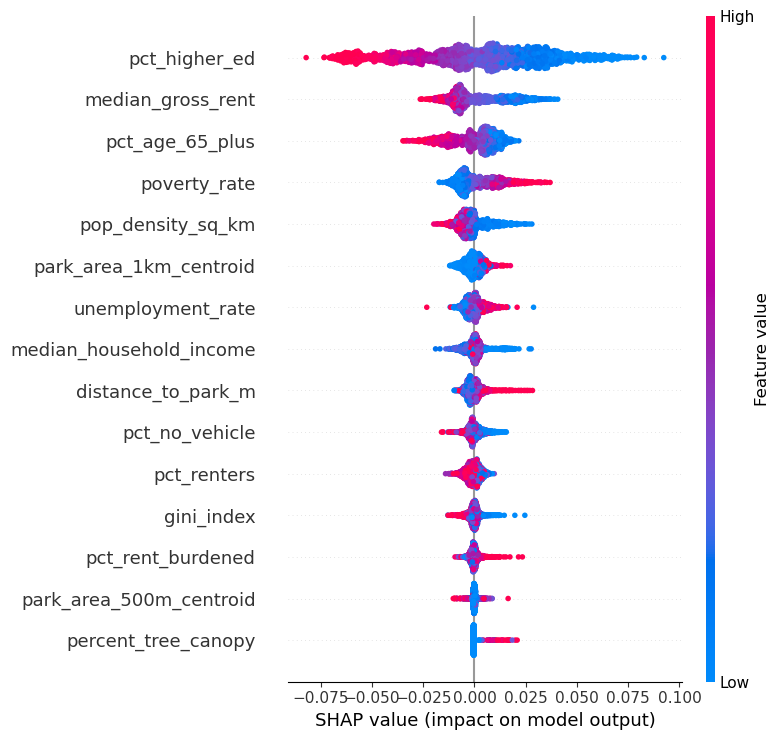

In [42]:
shap.summary_plot(shap_values, X)

This SHAP summary plot gives us an idea of how specific values of the model's most influential features contribute to the model's predictions for long-run mobility outcomes. 

For its most influential features (gini_index, poverty_rate, and pct_higher_ed), the effects don't appear to be perfectly linear, suggesting that these feature behave differently depending on neighborhood context rather than having a consistent, monotonic relationship with mobility outcomes across all tract predictions. These relationships will be observed in more depth in the dependence plots below.

Importantly, these observed relationships are correlations learned by the model rather than causal effects. As such, these results should be interpreted as signals for further investigation, such as causal inference, in order to make any policy reccomendations based on the features observed in the plot.

#### **C. Dependence Plots**

How do model predictions change with respect to individual features?

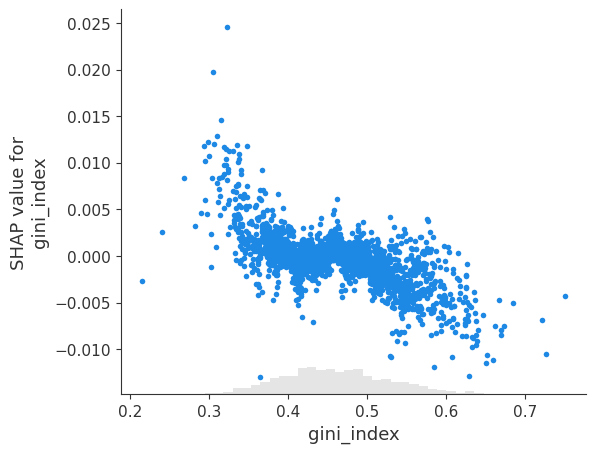

In [32]:
shap.plots.scatter(shap_values[:, "gini_index"])

Here we observe a positive association between gini-index and economic mobility predictions, but it is **not perfectly linear.** We actually see clusters forming in a stepwise fashion. 

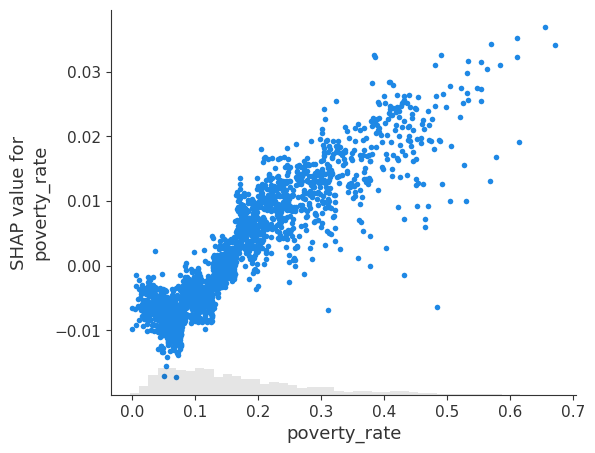

In [33]:
shap.plots.scatter(shap_values[:, "poverty_rate"])

Here we see a steep negative association between poverty rate and model predictions, but only up until about the 15% poverty threshold, after which the effects seem to plateau. 

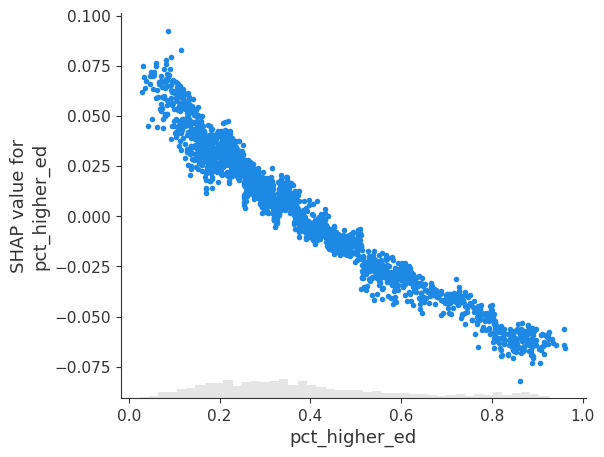

In [34]:
shap.plots.scatter(shap_values[:, "pct_higher_ed"])

Here we observe a relatively neutral impact of higher education on model predictions, up until about 80% prevalence of higher ed degrees. At this point, we observe a negative association with predicted mobility outcomes. 

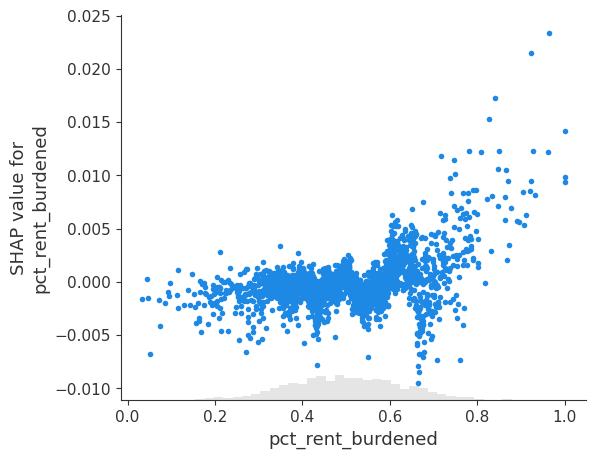

In [35]:
shap.plots.scatter(shap_values[:, "pct_rent_burdened"])

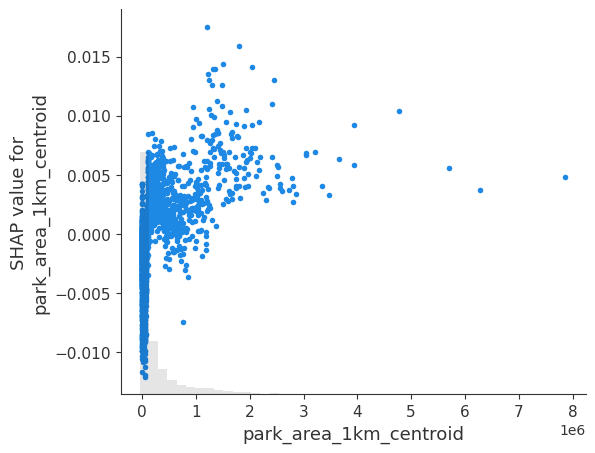

In [36]:
shap.plots.scatter(shap_values[:, "park_area_1km_centroid"])

Little effect on model predictions